## Python statistics essential training - 04_03_bootstrapping

Standard imports

In [4]:
import math
import io

In [5]:
import numpy as np
import pandas as pd

import matplotlib
import matplotlib.pyplot as pp

%matplotlib inline

In [6]:
import scipy.stats
import scipy.optimize
import scipy.spatial

In [9]:
pop = pd.read_csv('grades.csv')

In [10]:
pop.head()

,grade
0,3.648651
1,5.959915
2,7.387370
3,4.047515
4,2.846912


<AxesSubplot:>

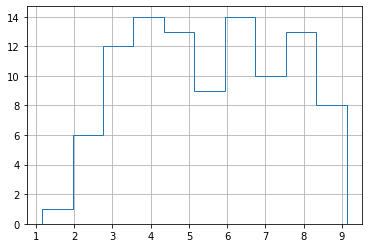

In [11]:
pop.grade.hist(histtype='step')

In [12]:
pop.describe()

,grade
count,100.000000
mean,5.508561
std,1.984988
min,1.160899
25%,3.921372
50%,5.688527
75%,7.272162
max,9.120705


In [14]:
# bootstraping: estimates the uncertatinty of our statistics, the mean, by generating
# a large family of samples from the one we have
# then charactarize the distribution of the mean, over this family

pop.sample(100,replace=True).describe()
# we see that the mean is a little different

,grade
count,100.000000
mean,5.841037
std,2.000242
min,1.160899
25%,4.210388
50%,6.052002
75%,7.687033
max,9.120705


In [15]:
bootstrap = pd.DataFrame({'meangrade': [pop.sample(100,replace=True).grade.mean() for i in range(1000)]})

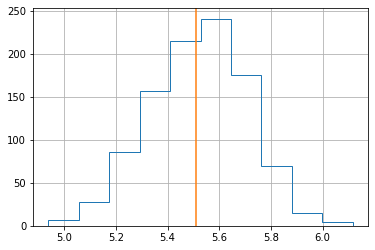

In [18]:
bootstrap.meangrade.hist(histtype='step')
pp.axvline(pop.grade.mean(),color='C1')

In [19]:
bootstrap.meangrade.quantile(0.025),bootstrap.meangrade.quantile(0.975)

(5.133494778715114, 5.870119511897491)

In [20]:
# bootstrap approximated a 95% interval between 5.1 and 5.8

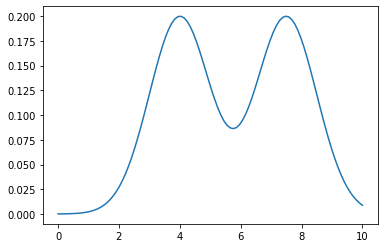

In [22]:
n1 = scipy.stats.norm(7.5,1)
n2 = scipy.stats.norm(4,1)

x = np.linspace(0,10,100)
pp.plot(x,0.5*n1.pdf(x) + 0.5*n2.pdf(x))

In [23]:
def draw():
        while True:
            v = n1.rvs() if np.random.rand() < 0.5 else n2.rvs()
            if 0 <= v <=10:
                return v 

In [24]:
draw()

7.242199878651955

In [26]:
def dataset(n=100):
    return pd.DataFrame({'grade':[draw() for i in range(n)]})

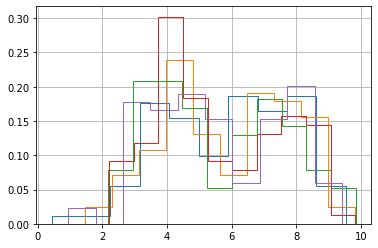

In [27]:
for i in range(5):
    dataset(100).grade.hist(histtype='step', density=True)

In [32]:
means = pd.DataFrame({'meangrade':[dataset(100).grade.mean() for i in range(1000)]})

<AxesSubplot:>

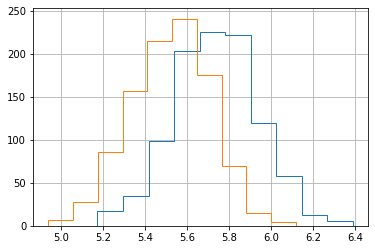

In [33]:
means.meangrade.hist(histtype='step')
bootstrap.meangrade.hist(histtype='step')

In [ ]:
# it justifies the approximate interval